In [34]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import operator
import pandas as pd

In [35]:
lg=LinearRegression()

In [36]:
import pickle

In [37]:
trainfile = open("./data/train.pkl", 'rb')
testfile = open("./data/test.pkl", 'rb')
trainP = pickle.load(trainfile)
testP = pickle.load(testfile)

In [38]:
# dodo=np.array(dodo)
# np.random.shuffle(dodo)
# print(dodo)

In [39]:
train=np.array(trainP)
test=np.array(testP)
np.random.shuffle(train)

In [40]:
print(train.shape)

(8000, 2)


In [42]:
print(test.shape)

(80, 2)


In [43]:
np.random.shuffle(train)

In [44]:
trainset=[]
for i in range(10):
  y=i*800
  trainset.append(train[y:y+800,:])

In [45]:
# print(trainset)

In [46]:
trainset=np.array(trainset)

In [47]:
test_x=test[:,0]
test_y=test[:,1]
# print(test)

Table-1
    Complexity        Bias         Bias^2       Variance
0            1  574.216119  492148.117037   24992.486111
1            2  567.579074  467927.238052   33044.050071
2            3   46.340878    4162.937722   34767.256817
3            4   50.310872    3784.558541   43443.297424
4            5   48.864544    3352.957369   49407.353432
5            6   46.865373    3070.684033   59521.268061
6            7   54.295290    4141.633573   82499.530679
7            8   53.376813    3990.492592   91043.185194
8            9   52.559712    3839.143051   97383.805410
9           10   52.698815    3851.793934  156772.942299
10          11   56.032355    4241.797483  163757.663591
11          12   64.450166    6825.682250  161435.222726
12          13   53.852982    4579.495682  152509.891302
13          14   82.220941   15745.941834  146979.981322
14          15   61.554040    6878.193600  179606.517887
15          16  108.015626   28863.027000  162458.005573
16          17   89.427

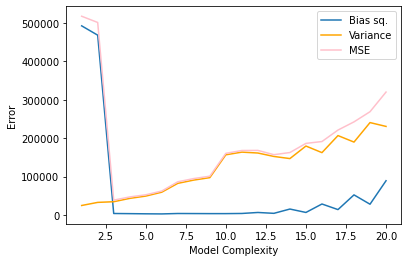

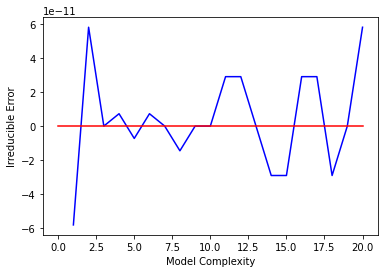

[574.2161191740997, 567.5790742509668, 46.34087809347131, 50.31087225462735, 48.86454385569315, 46.865373228072066, 54.295289719025774, 53.37681283253123, 52.55971163936063, 52.69881505152134, 56.032355280370496, 64.45016556541633, 53.8529820803562, 82.22094130029151, 61.55404021159801, 108.01562550154613, 89.42717959703931, 153.8407972022084, 123.79404874113075, 199.29857082508883]
[517140.6031482985, 500971.28812304913, 38930.19453952392, 47227.855965319555, 52760.31080065636, 62591.952093940614, 86641.16425187702, 95033.67778626744, 101222.94846117127, 160624.7362330145, 167999.46107404906, 168260.90497607837, 157089.38698419332, 162725.9231565663, 186484.7114874033, 191321.03257296936, 221121.5928141716, 242450.96553924432, 268868.0157471252, 319973.74842152867]


In [48]:
lrg=LinearRegression()
bias2=[]
mse=[]
biAs=[]
ind_list=[]
variance=[]
irr_err=[]
sort_axis = operator.itemgetter(0)
sorted_zip1 = sorted(zip(test_x,test_y), key=sort_axis)
test_x, test_y = zip(*sorted_zip1)
for j in range(1,21,1):
  ind_list.append(j)
  vari=0
  bias=0
  exp=0
  f_cap=[]
  var_arr=[]
  avd=[]
  for i in range(len(test[:,0])):
      f_cap.append(0)
      var_arr.append(0)
      # print(test_x[i],test_y[i])
  varian=0.0
  mse_ar=np.zeros(len(test_x))
  for i in range(10):
      lol=trainset[i]
      y = lol[:,1]
      poly_f= PolynomialFeatures(degree=j)
      x_poly = poly_f.fit_transform(lol[:,0].reshape(-1,1))
      reg=lrg.fit(x_poly,y)
      test_poly= poly_f.fit_transform(test[:,0].reshape(-1,1))
      predic=lrg.predict(test_poly)
      predic=np.array(predic)
      sorted_zip = sorted(zip(test[:,0],predic), key=sort_axis)
      test_x, predic = zip(*sorted_zip)
#       plt.scatter(test_x,test_y)
#       plt.plot(test_x,predic)
      avd.append(predic)
      # print(test.shape)
      for a in range(len(test_x)):
        f_cap[a]+=predic[a]
        mse_ar[a]+=(test_y[a]-predic[a])**2
        # print(test_y[a],test_x[a])
        # print(predic[a],test_x[a])
        # print('------------------')
      # plt.show()
  mse.append(np.average(mse_ar)/10)
  sorted_zip1 = sorted(zip(test_x,test_y), key=sort_axis)
  test_x, test_y = zip(*sorted_zip1)
  newBias=0
  for i in range(len(f_cap)):
      f_cap[i]= f_cap[i]/10
      # print(f_cap[i],test_y[i])
      bias+=(f_cap[i]-test_y[i])**2
      newBias+=abs(f_cap[i]-test_y[i])
      # print(bias)
#   plt.scatter(test_x,test_y)
#   plt.plot(test_x,f_cap,'blue')
#   plt.title('Graph for degree %s'%(j))
#   plt.show()
  for i in range(10):
    for x in range(len(test_x)):
      var_arr[x]+=(avd[i][x]-f_cap[x])**2
  for x in range(len(test_x)):
      var_arr[x]=var_arr[x]/10
  var_arr= np.array(var_arr)
  varian=np.average(var_arr)
  variance.append(varian)
  bias=bias/len(f_cap)
  newBias = newBias/len(f_cap)
  irr_err.append(np.average(mse_ar)/10-(bias+varian))
  bias2.append(bias)
  biAs.append(newBias)
plt.plot(ind_list,bias2)
plt.plot(ind_list,variance,'orange')
plt.plot(ind_list,mse,'pink')
plt.legend(["Bias sq.","Variance","MSE", "Irreducible Error"])
plt.ylabel('Error')
plt.xlabel('Model Complexity')
bv_df = pd.DataFrame(list(zip(ind_list,biAs,bias2,variance)))
bv_df.columns=['Complexity','Bias','Bias^2','Variance']
irr_df=pd.DataFrame(list(zip(ind_list,irr_err)))
irr_df.columns=['Complexity','Irreducible Error']
print('Table-1')
print(bv_df)
print('Table-2')
print(irr_df)
# print(bias2)
# print(variance)
plt.show()
plt.plot(ind_list,irr_err,'blue')
plt.plot([0,20],[0,0],'red')
plt.ylabel('Irreducible Error')
plt.xlabel('Model Complexity')
plt.show()
print(biAs)
print(mse)